<img src="Netflix_Logo_RGB.png" width="2945" height="1321">

# Importing Necessary Libraries

In [91]:
import kaggle
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# using dataset from https://www.kaggle.com/datasets/shivamb/netflix-shows/data
!kaggle datasets download -d shivamb/netflix-shows

In [ ]:
# Unzip the downloaded dataset
with zipfile.ZipFile("netflix-shows.zip", 'r') as zip_ref:
    zip_ref.extractall("netflix_data")

print("✅ Unzipped successfully!")

# Loading the Dataset

In [92]:
df = pd.read_csv("netflix_data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [93]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Columns of the Dataset

In [94]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Shape of the Dataset

In [95]:
df.shape

# Our dataset has 8807 rows with 12 columns

(8807, 12)

# Information of the dataset

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Summary Statistics

In [97]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Datatypes of the Columns

In [98]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [99]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [100]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


There is no duplicates in our entire dataset.

In [101]:
print("No. of Missing values are:")
df.isna().sum()

No. of Missing values are:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

we have missing values in director, cast, country, date_added, rating and duration columns.

In [102]:
# Handling director, cast, country, date_added, rating and duration columns.

# Calculates the most frequent (mode) value in the 'rating' column and takes the first one (in case there are multiple modes)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [103]:
# Checking again for missing values
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [104]:
# the count of each unique value for a column
df['duration'].value_counts()

duration
1 Season     1796
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [105]:
# Check unique values in the rating column
# TODO: will separate seasons and duration
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [106]:
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [107]:
# As we can see there is an unnecessary prefix 's' is there so I will remove it

df['show_id'] = df['show_id'].str.replace('s','')
df['show_id'].unique()

array(['1', '2', '3', ..., '8805', '8806', '8807'], dtype=object)

In [108]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [109]:
df['cast'].unique

<bound method Series.unique of 0                                                 Unknown
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 Unknown
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              Unknown
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object>

In [110]:
# for simple understanding, renaming the listed_in column to genre

df.rename(columns={'listed_in':'genre'}, inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [111]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [112]:
df['date_added'] = pd.to_datetime(df['date_added'], format="mixed", dayfirst=False, errors='coerce')
df

# converted the format into YYYY-MM-DD

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [113]:
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [114]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month_added,month_name_added,year_added
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,July,2019
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020


# Creating separate dataframes

In [115]:
# Splitting and expanding the 'cast' column
df['cast_list'] = df['cast'].str.split(', ')
# Then explode it
df_cast = df[['show_id', 'cast_list']].explode('cast_list').rename(columns={'cast_list': 'cast'})

# Splitting and expanding the 'country' column
df['country_list'] = df['country'].str.split(',')
df_country = df[['show_id', 'country_list']].explode('country_list').rename(columns={'country_list':'country'})

# Splitting and expanding the 'director' column
df['direct_list'] = df['director'].str.split(',')
df_direct = df[['show_id', 'direct_list']].explode('direct_list').rename(columns={'direct_list':'director'})

# Splitting and expanding the 'genre' column
df['genre_list'] = df['genre'].str.split(',')
df_genre = df[['show_id', 'genre_list']].explode('genre_list').rename(columns={'genre_list':'genre'})

In [116]:
df_cast

,show_id,cast
0,1,Unknown
1,2,Ama Qamata
1,2,Khosi Ngema
1,2,Gail Mabalane
1,2,Thabang Molaba
...,...,...
8806,8807,Manish Chaudhary
8806,8807,Meghna Malik
8806,8807,Malkeet Rauni
8806,8807,Anita Shabdish


In [117]:
df_country

,show_id,country
0,1,United States
1,2,South Africa
2,3,United States
3,4,United States
4,5,India
...,...,...
8802,8803,United States
8803,8804,United States
8804,8805,United States
8805,8806,United States


In [118]:
df_direct

,show_id,director
0,1,Kirsten Johnson
1,2,Unknown
2,3,Julien Leclercq
3,4,Unknown
4,5,Unknown
...,...,...
8802,8803,David Fincher
8803,8804,Unknown
8804,8805,Ruben Fleischer
8805,8806,Peter Hewitt


In [119]:
df_genre

,show_id,genre
0,1,Documentaries
1,2,International TV Shows
1,2,TV Dramas
1,2,TV Mysteries
2,3,Crime TV Shows
...,...,...
8805,8806,Children & Family Movies
8805,8806,Comedies
8806,8807,Dramas
8806,8807,International Movies


In [120]:
df.drop(['cast_list','country_list', 'direct_list','genre_list'], axis=1, inplace=True)

In [121]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month_added,month_name_added,year_added
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019
8803,8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,July,2019
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020


# So let’s get started with the analysis 😃

## No. of Titles Netflix has

In [122]:
total = df['show_id'].count()
print("Total no. of Titles are:",total)

Total no. of Titles are: 8807


## Types of Content available on Netflix

In [123]:
df.groupby('type')['show_id'].count()

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

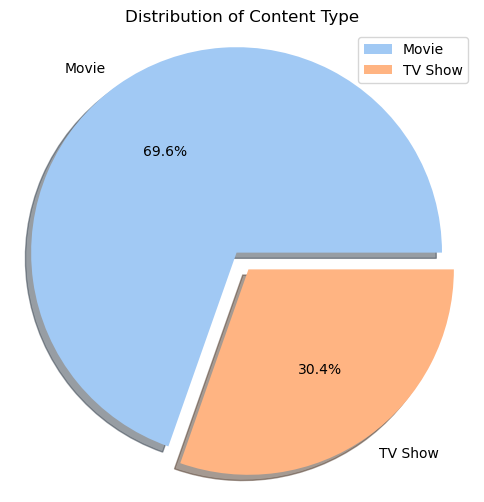

In [124]:
type_counts = df.groupby('type')['show_id'].count()
plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels = type_counts.index,
    autopct="%1.1f%%",
    colors = sns.color_palette('pastel'),
    explode=(0.1,0),
    shadow=True
)
plt.title('Distribution of Content Type')
plt.legend()
plt.axis('equal')
plt.show()

Most of the content of Netflix are Movies while there are only 30.4% of TV shows available

## Top 10 countries where Netflix is popular

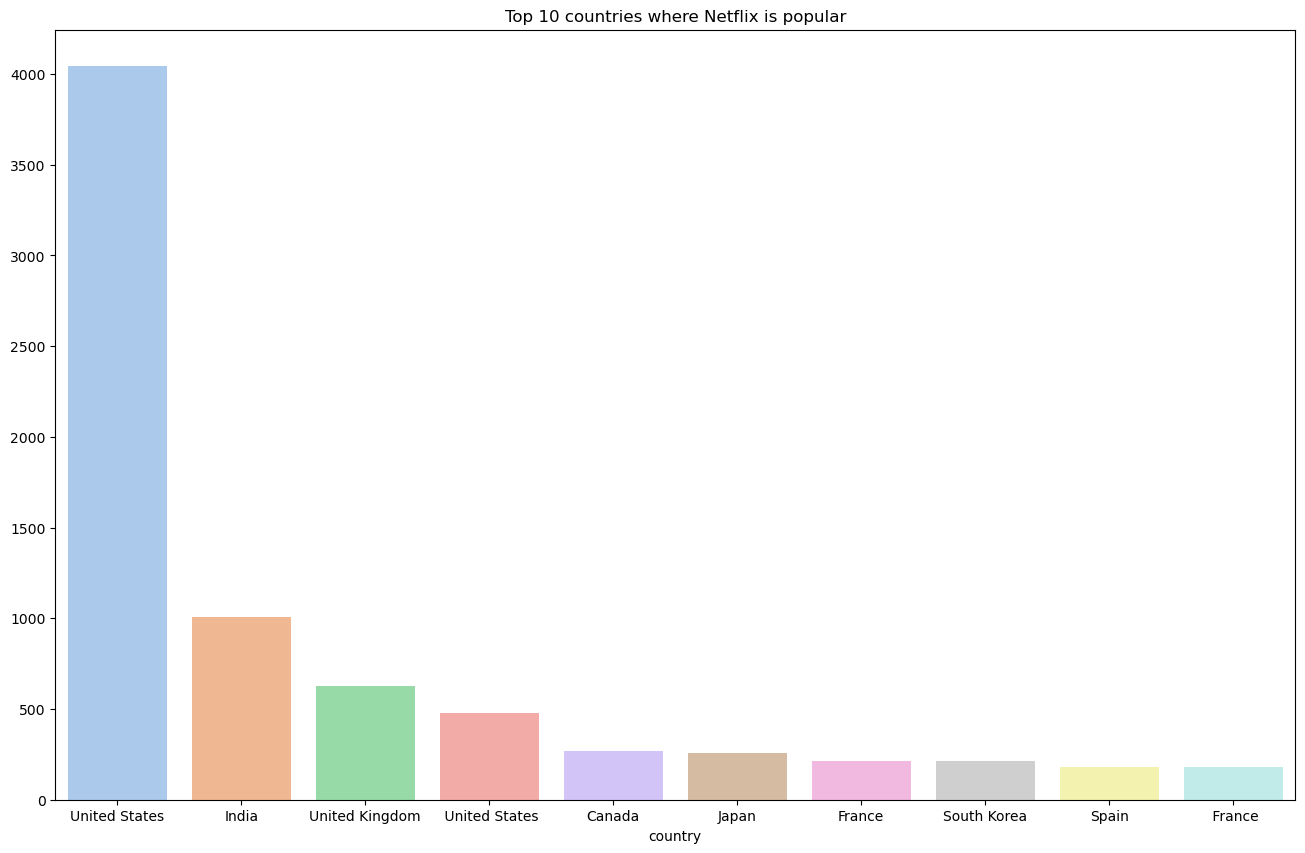

In [125]:
country_counts = df_country['country'].value_counts().head(10)

plt.figure(figsize=(16, 10), dpi=100)
sns.barplot(x=country_counts.index, y=country_counts.values,palette = sns.color_palette('pastel'))
plt.title("Top 10 countries where Netflix is popular")
plt.show()

It shows that United States is the top country where Netflix is popular.

## Common Genre in Netflix

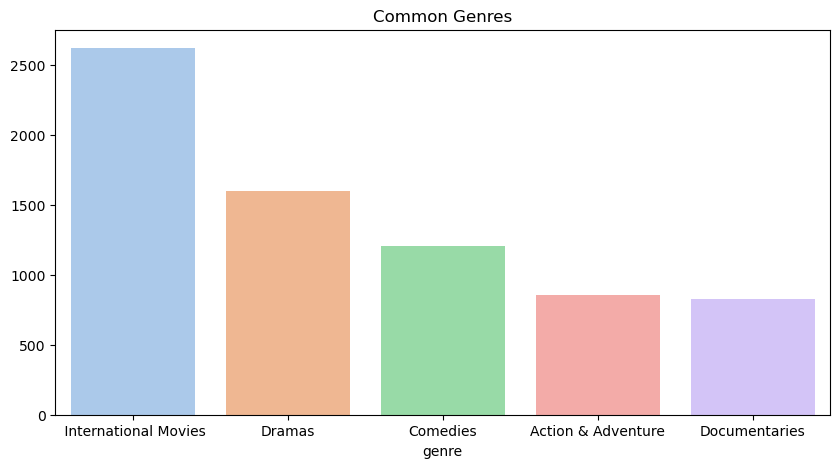

In [126]:
genre_counts = df_genre['genre'].value_counts().head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.index, y=genre_counts.values,palette = sns.color_palette('pastel'))
plt.title("Common Genres")
plt.show()

International Movies and Dramas are the top two genres

## No. of Shows based on type and rating

In [127]:
df.groupby(['rating'])['show_id'].count()

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3211
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
Name: show_id, dtype: int64

In [130]:
# First, inspect suspicious values in rating column
invalid_ratings = ['74 min', '84 min', '66 min']

# View the affected rows
invalid_rows = df[df['rating'].isin(invalid_ratings)]
print(invalid_rows[['show_id', 'title', 'rating', 'duration']])

     show_id                                 title  rating  duration
5541    5542                       Louis C.K. 2017  74 min  1 Season
5794    5795                 Louis C.K.: Hilarious  84 min  1 Season
5813    5814  Louis C.K.: Live at the Comedy Store  66 min  1 Season


As you can see the rating value like 66 min, 74 min and 84 min are wrong values of the rating column because already there are values in duration. So its better to drop these rows.

In [131]:
df = df[~df['rating'].isin(invalid_ratings)]

In [132]:
# Checking after drop
df.groupby(['rating'])['show_id'].count()

rating
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3211
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
Name: show_id, dtype: int64

In [243]:
# Final Answer
df.groupby(['rating', 'type'])['show_id'].count().sort_values(ascending=False)

rating    type   
TV-MA     Movie      2064
TV-14     Movie      1427
TV-MA     TV Show    1147
R         Movie       797
TV-14     TV Show     733
TV-PG     Movie       540
PG-13     Movie       490
TV-PG     TV Show     323
PG        Movie       287
TV-Y7     TV Show     195
TV-Y      TV Show     176
TV-Y7     Movie       139
TV-Y      Movie       131
TV-G      Movie       126
          TV Show      94
NR        Movie        75
G         Movie        41
NR        TV Show       5
TV-Y7-FV  Movie         5
NC-17     Movie         3
UR        Movie         3
R         TV Show       2
TV-Y7-FV  TV Show       1
Name: show_id, dtype: int64

## Which country has highest production of movies and TV shows ?

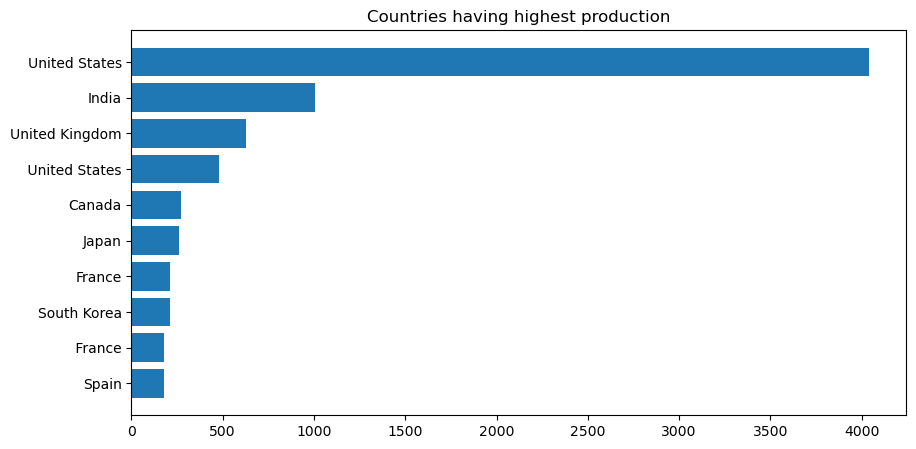

In [134]:
high_prod = df_country['country'].value_counts().head(10).sort_values()

plt.figure(figsize=(10,5))
plt.barh(high_prod.index, high_prod.values)
plt.title("Countries having highest production")
plt.show()

You can see there's United States value has been repeated. Lets see what's the reason behind this

In [135]:
df_country['country'].unique()

array(['United States', 'South Africa', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Lebanon', 'R

There are some spaces in the string values so lets remove those spaces

In [136]:
df_country['country'] = df_country['country'].str.strip()

In [137]:
df_country['country'].unique()

array(['United States', 'South Africa', 'India', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic',
       'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China',
       'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea',
       'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela',
       'Hong Kong', 'Russia', '', 'Ireland', 'Nepal', 'New Zealand',
       'Brazil', 'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel',
       'Taiwan', 'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Denmark', 'Kuwait',
       'Netherlands', 'Malaysia', 'Vietnam', 'Hungary', 'Sweden',
       'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malta', 'Namibia', 'A

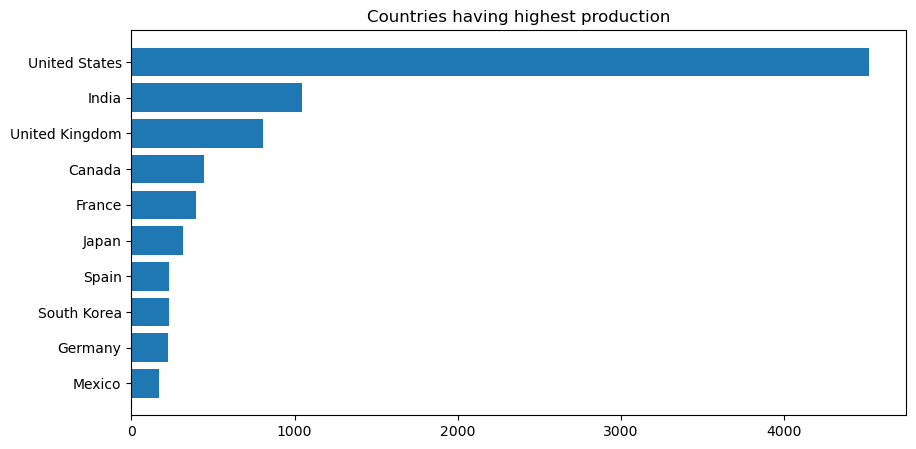

In [138]:
high_prod = df_country['country'].value_counts().head(10).sort_values()

plt.figure(figsize=(10,5))
plt.barh(high_prod.index, high_prod.values)
plt.title("Countries having highest production")
plt.show()

United States has been a major producer of both movies and TV shows

## Top 10 Actors by Movie/TV show count

In [139]:
top_10 = df_cast['cast'].value_counts().head(10)
top_10

cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: count, dtype: int64

As the Unknown entries are high so to refine our result lets exclude them

In [140]:
filtered_df_cast = df_cast[~df_cast['cast'].isin(['Unknown'])]
top_10 = filtered_df_cast['cast'].value_counts().head(10)
top_10

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

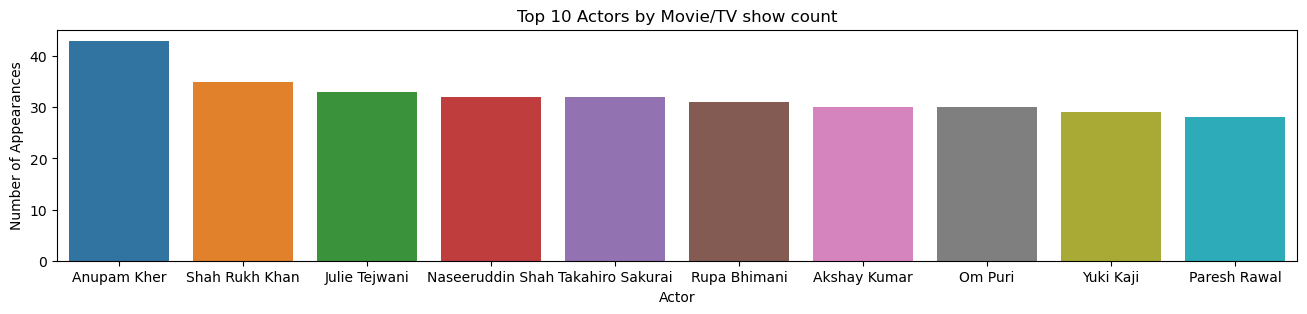

In [141]:
plt.figure(figsize=(16,3))
sns.barplot(x=top_10.index, y=top_10.values)
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Actors by Movie/TV show count')
plt.show()

Anupam Kher has the highest number of appearances in movies and TV shows

## Top 10 Directors by Movie/TV show

In [142]:
top_10 = df_direct['director'].value_counts().head(10)
top_10

director
Unknown                2634
Rajiv Chilaka            22
 Jan Suter               18
Raúl Campos              18
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
Name: count, dtype: int64

To refine our result, excluding the unknown entries

In [143]:
filtered_df_direct = df_direct[~df_direct['director'].isin(['Unknown'])]
top_10 = filtered_df_direct['director'].value_counts().head(10)
top_10

director
Rajiv Chilaka          22
Raúl Campos            18
 Jan Suter             18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: count, dtype: int64

I see some space in strings so removing those space

In [144]:
df_direct['director'] = df_direct['director'].str.strip()

In [145]:
filtered_df_direct = df_direct[~df_direct['director'].isin(['Unknown'])]
top_10 = filtered_df_direct['director'].value_counts().head(10)
top_10

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64

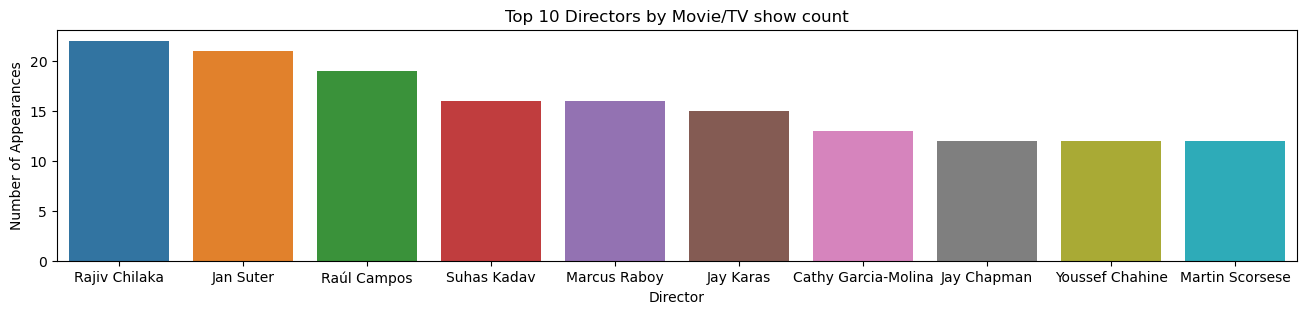

In [146]:
plt.figure(figsize=(16,3))
sns.barplot(x=top_10.index, y=top_10.values)
plt.xlabel('Director')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Directors by Movie/TV show count')
plt.show()

Rajiv Chilaka has the most number of appearances as a director in Movies and TV shows of Netflix.

## Top 10 Categories by Movie/TV show count

In [147]:
top_10 = df_genre['genre'].value_counts().head(10)
top_10

genre
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64

I see space on some string, let me remove those spaces

In [148]:
df_genre['genre'] = df_genre['genre'].str.strip()

In [149]:
top_10 = df_genre['genre'].value_counts().head(10)
top_10

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

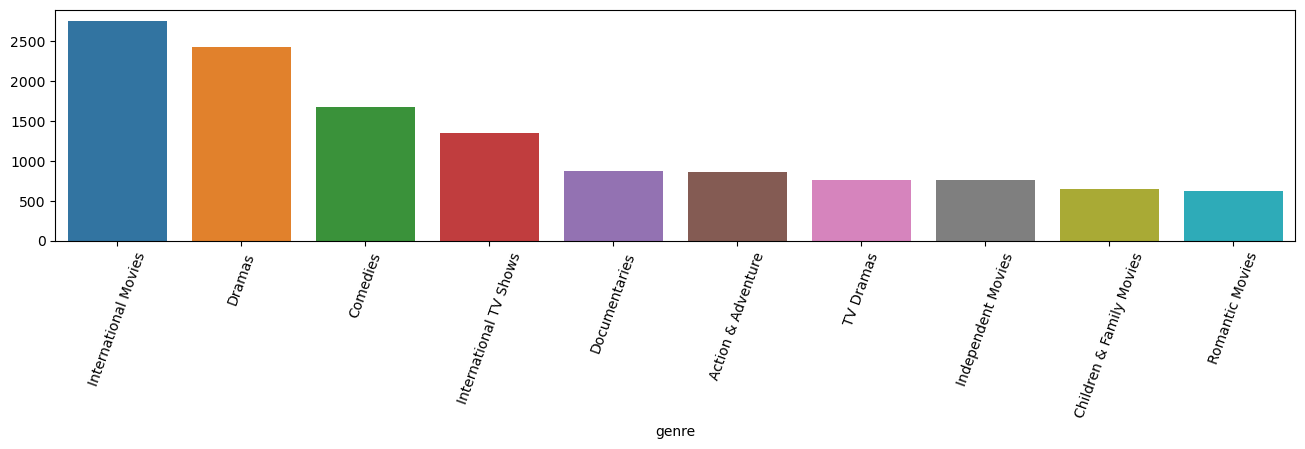

In [150]:
plt.figure(figsize=(16,3))
sns.barplot(x=top_10.index, y=top_10.values, dodge=True)
plt.xticks(rotation=70)
plt.show()

## Movies & TV Shows Added Over Time

### 1. Count by Year + Type

In [151]:
df_over_time = df.groupby(['year_added', 'type']).size().reset_index(name='count')
df_over_time

,year_added,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [152]:
# Pivot so we can use fill_between directly
df_over_time_filled = df_over_time.pivot(index='year_added', columns='type', values='count').fillna(0)
df_over_time_filled

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,176.0


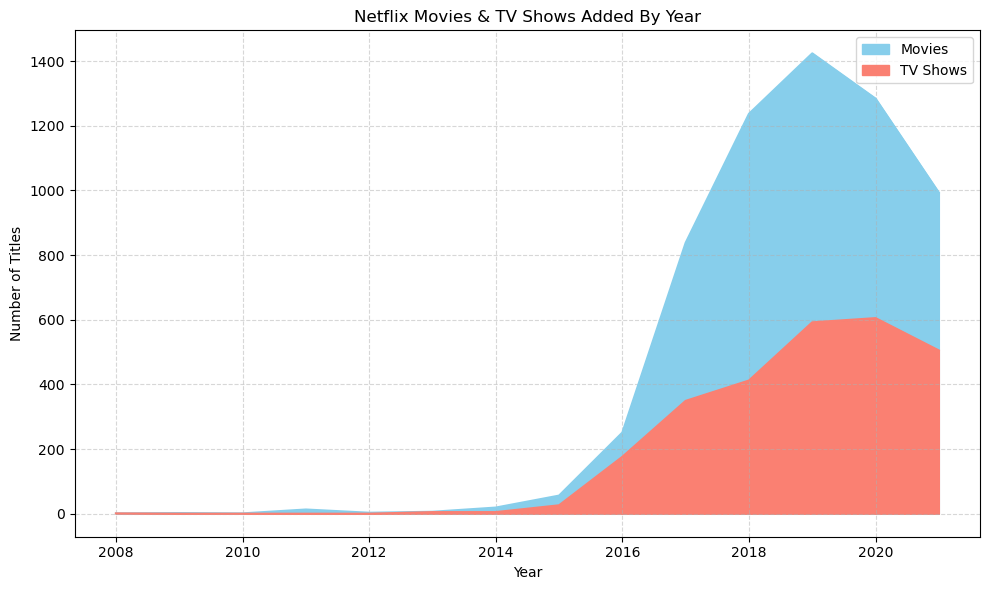

In [153]:
plt.figure(figsize=(10, 6))

# Plotting the line charts
plt.plot(df_over_time_filled.index, df_over_time_filled['Movie'], color='skyblue')
plt.plot(df_over_time_filled.index, df_over_time_filled['TV Show'], color='salmon')

# Filling area under line plots
plt.fill_between(df_over_time_filled.index, df_over_time_filled['Movie'], label='Movies', color='skyblue')
plt.fill_between(df_over_time_filled.index, df_over_time_filled['TV Show'], label='TV Shows', color='salmon')

plt.title("Netflix Movies & TV Shows Added By Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### 2. Count by Month + Type

In [154]:
df_over_month = df.groupby(['month_name_added','type']).size().reset_index(name='count')
df_over_month

,month_name_added,type,count
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,266
6,February,Movie,382
7,February,TV Show,181
8,January,Movie,546
9,January,TV Show,202


In [155]:
# Sort by month order (Jan to Dec)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_over_month['month_name_added'] = pd.Categorical(df_over_month['month_name_added'], categories=month_order, ordered=True)
df_over_month = df_over_month.sort_values('month_name_added')
df_over_month

,month_name_added,type,count
8,January,Movie,546
9,January,TV Show,202
6,February,Movie,382
7,February,TV Show,181
15,March,TV Show,213
14,March,Movie,529
0,April,Movie,549
1,April,TV Show,214
17,May,TV Show,193
16,May,Movie,439


In [156]:
df_over_month_filled = df_over_month.pivot(index='month_name_added', columns='type', values='count').fillna(0)
df_over_month_filled

type,Movie,TV Show
month_name_added,,
January,546,202
February,382,181
March,529,213
April,549,214
May,439,193
June,492,236
July,565,262
August,518,236
September,518,251


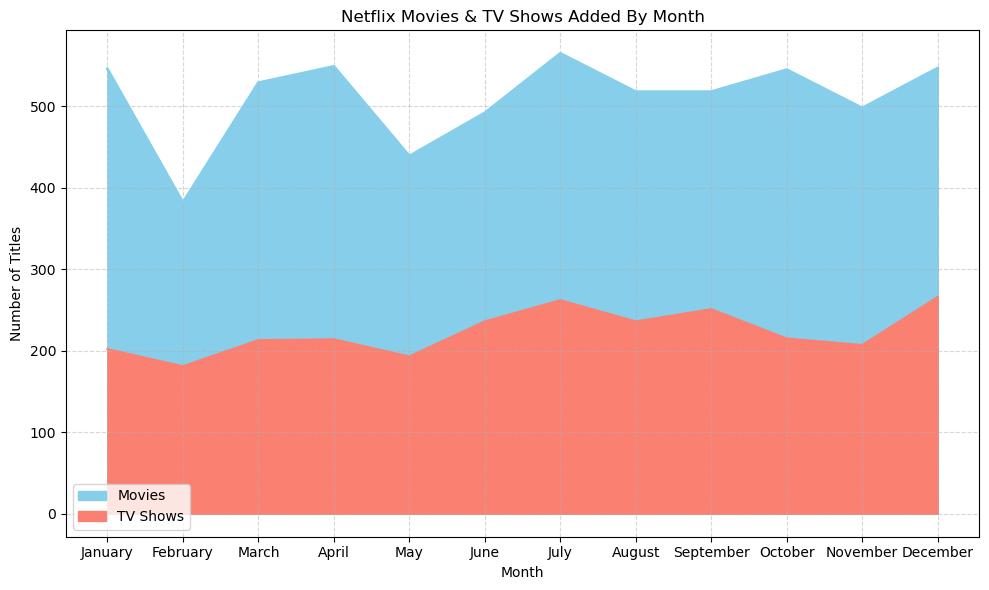

In [157]:
plt.figure(figsize=(10, 6))

# Plotting the line charts
plt.plot(df_over_month_filled.index, df_over_month_filled['Movie'], color='skyblue', linewidth=2)
plt.plot(df_over_month_filled.index, df_over_month_filled['TV Show'], color='salmon')

# Filling area under line plots
plt.fill_between(df_over_month_filled.index, df_over_month_filled['Movie'], label='Movies', color='skyblue')
plt.fill_between(df_over_month_filled.index, df_over_month_filled['TV Show'], label='TV Shows', color='salmon')

plt.title("Netflix Movies & TV Shows Added By Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

July and December have the highest total content additions, likely due to:<br>
- 🎄 Holidays (December)
- ☀️ Summer releases or campaigns (July)

February is noticeably lower in total content added — possibly due to it being a shorter month.

## Distribution of Ratings

In [158]:
ratings = df['rating'].value_counts()
ratings

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

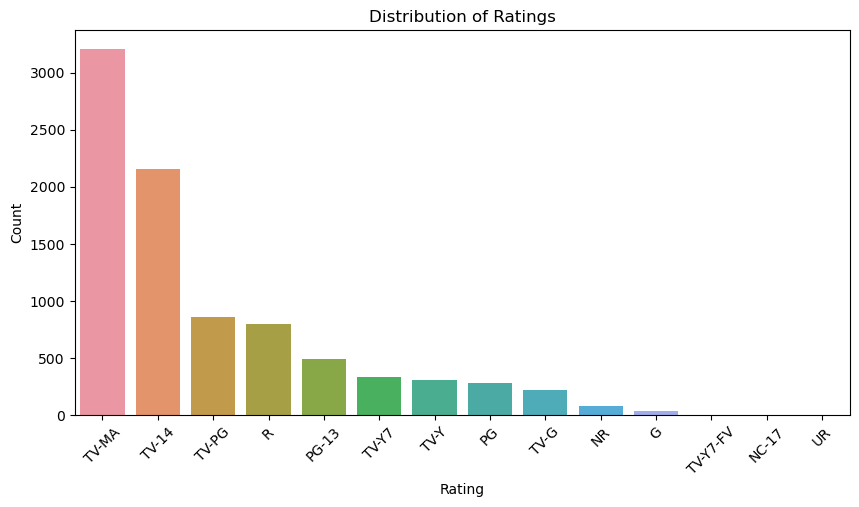

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(x=ratings.index, y=ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

## Genre Correlation Heatmap

In [160]:
df_genre

,show_id,genre
0,1,Documentaries
1,2,International TV Shows
1,2,TV Dramas
1,2,TV Mysteries
2,3,Crime TV Shows
...,...,...
8805,8806,Children & Family Movies
8805,8806,Comedies
8806,8807,Dramas
8806,8807,International Movies


In [161]:
# .corr() only works on DataFrames with multiple numeric columns to compute pairwise correlations.
genre_matrix = df_genre.drop_duplicates().pivot_table(
    index='show_id',
    columns='genre',
    aggfunc=lambda x: 1,
    fill_value=0
)
genre_matrix.head(10)

genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
show_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1003,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
# Compute pairwise correlation between genres
genre_corr = genre_matrix.corr()
genre_corr

genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
genre,,,,,,,,,,,,,,,,,,,,,
Action & Adventure,1.000000,0.184349,-0.046945,-0.056538,-0.053803,-0.018566,0.066083,0.019240,-0.078057,0.055957,...,-0.045845,-0.087370,-0.101250,-0.030468,-0.034874,-0.032261,-0.014025,-0.026534,-0.029214,-0.073127
Anime Features,0.184349,1.000000,-0.012874,-0.015504,0.043171,-0.005091,0.011859,-0.043673,-0.021405,-0.008127,...,-0.012572,-0.023959,-0.027765,-0.008355,-0.009563,-0.008847,-0.003846,-0.007276,-0.008011,-0.023870
Anime Series,-0.046945,-0.012874,1.000000,-0.024558,-0.040008,-0.008065,-0.016498,-0.069178,0.023852,-0.012874,...,-0.013982,-0.037951,-0.043980,0.039745,-0.015148,-0.014013,-0.006092,0.069419,0.125350,-0.037811
British TV Shows,-0.056538,-0.015504,-0.024558,1.000000,-0.048184,0.062737,-0.019869,-0.083314,0.110383,-0.015504,...,0.000864,0.061093,0.005029,-0.008541,-0.018243,-0.009883,-0.007337,0.003073,-0.015282,-0.045537
Children & Family Movies,-0.053803,0.043171,-0.040008,-0.048184,1.000000,-0.015823,0.002136,0.165050,-0.066522,-0.015482,...,-0.039070,-0.074459,-0.086288,-0.025966,-0.029720,-0.027494,-0.011953,-0.022613,-0.024897,-0.074184
Classic & Cult TV,-0.018566,-0.005091,-0.008065,0.062737,-0.015823,1.000000,-0.006525,-0.027359,0.031459,-0.005091,...,0.095338,0.049994,0.011287,0.060617,0.013237,0.077465,-0.002409,-0.004558,-0.005019,-0.014954
Classic Movies,0.066083,0.011859,-0.016498,-0.019869,0.002136,-0.006525,1.000000,0.002414,-0.027431,0.134369,...,-0.016111,-0.030703,-0.035581,-0.010707,-0.012255,-0.011337,-0.004929,-0.009325,-0.010266,-0.018515
Comedies,0.019240,-0.043673,-0.069178,-0.083314,0.165050,-0.027359,0.002414,1.000000,-0.115023,0.079301,...,-0.067556,-0.128746,-0.149200,-0.044897,-0.051389,-0.047539,-0.020667,-0.039100,-0.043049,-0.118915
Crime TV Shows,-0.078057,-0.021405,0.023852,0.110383,-0.066522,0.031459,-0.027431,-0.115023,1.000000,-0.021405,...,0.118305,-0.008153,0.250132,-0.005512,0.085579,-0.012905,-0.010129,0.050135,-0.015369,-0.062868


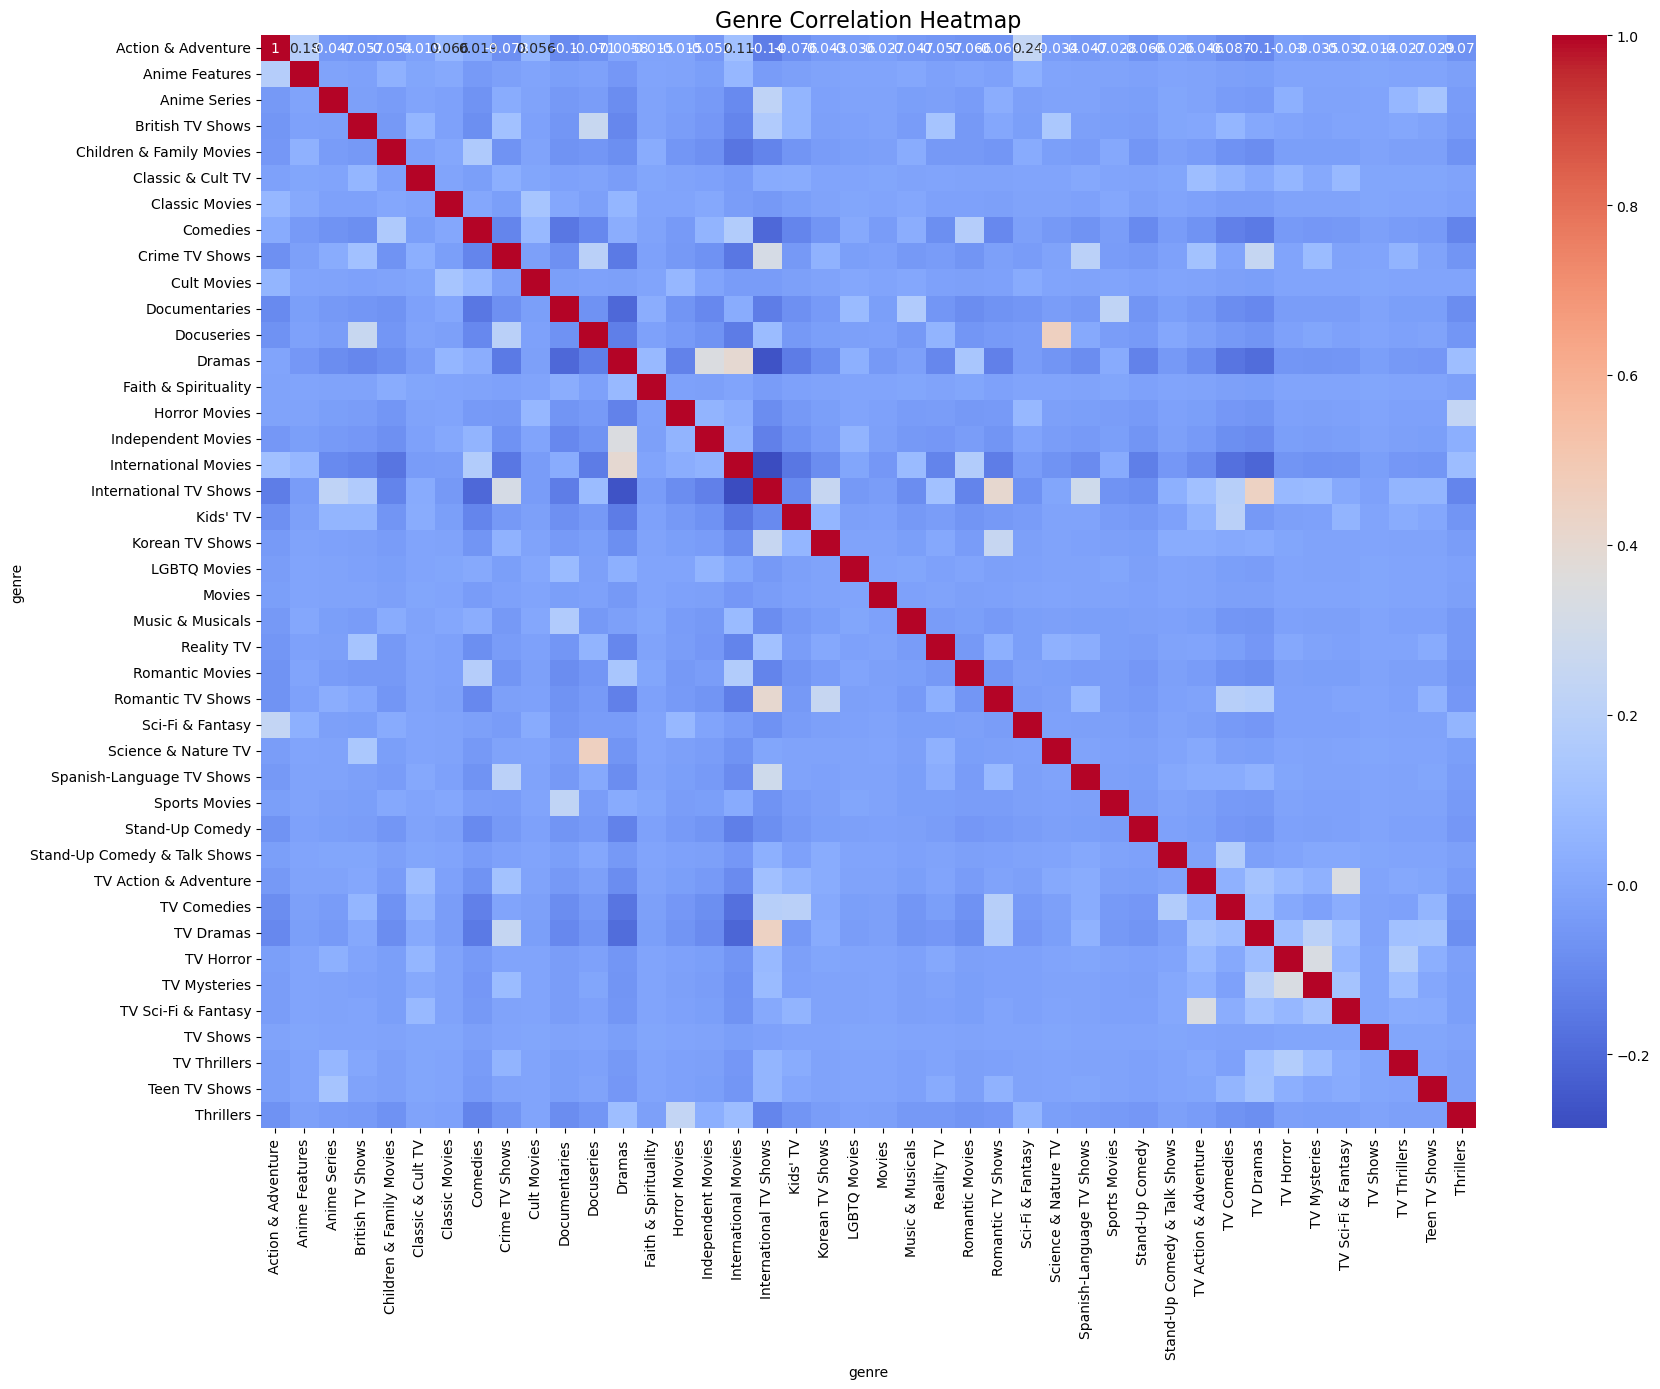

In [163]:
plt.figure(figsize=(18,14))
sns.heatmap(genre_corr, cmap='coolwarm', annot=True)
plt.title("Genre Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

## Distribution of TV show Episode counts

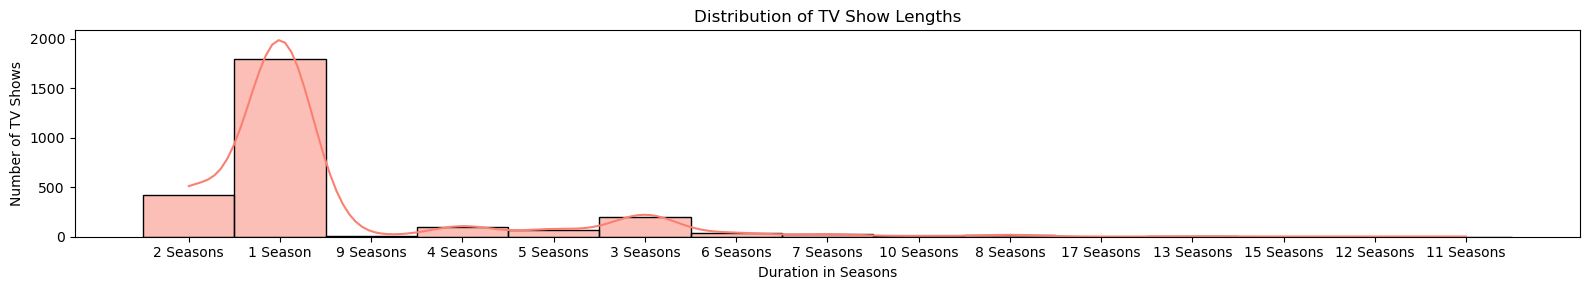

In [186]:
plt.figure(figsize=(16,3))
sns.histplot(
    data=df[df['type'] == 'TV Show'],
    x='duration',
    bins=30,
    kde=True,
    color='salmon'
)
plt.title("Distribution of TV Show Lengths")
plt.xlabel("Duration in Seasons")
plt.ylabel("Number of TV Shows")
plt.tight_layout()
plt.show()

We can observe that:
- There is a huge peak at 1 season
- Sharp drop after 1 season. Very few TV shows extend beyond 1 season here.
- Very small counts after 3-4 seasons

## Top 10 movies and TV show's duration of content

In [211]:
df_movies = df[df['type']=='Movie']
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month_added,month_name_added,year_added
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021
7,8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
9,10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
12,13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,March,2016
8802,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020


In [212]:
top_10_movies_duration = df_movies['duration'].value_counts().head(10).sort_values(ascending=True)

In [213]:
top_10_movies_duration

duration
98 min     120
102 min    122
92 min     129
96 min     130
95 min     137
91 min     144
94 min     146
93 min     146
97 min     146
90 min     152
Name: count, dtype: int64

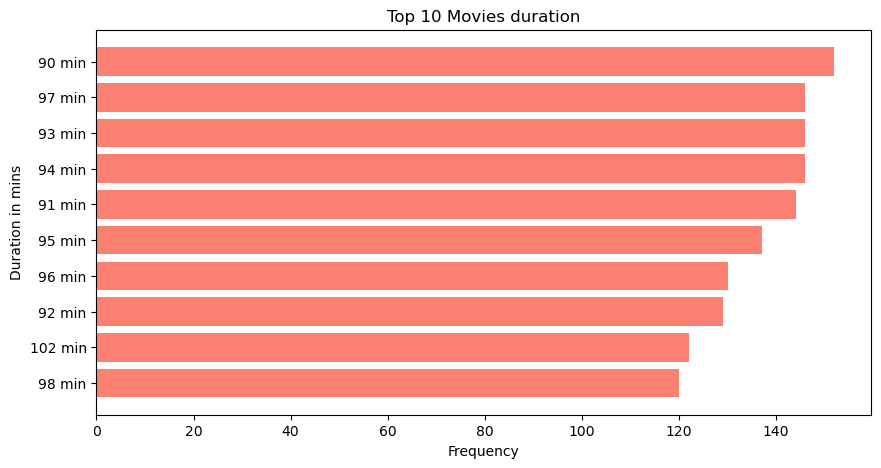

In [246]:
plt.figure(figsize=(10,5))
plt.barh(top_10_movies_duration.index, top_10_movies_duration.values, color="salmon")
plt.title("Top 10 Movies duration")
plt.xlabel("Frequency")
plt.ylabel("Duration in mins")
plt.show()

In [219]:
df_tv = df[df['type']=='TV Show']
df_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,month_added,month_name_added,year_added
1,2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
5,6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,5,May,2018
8796,8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",1,January,2017
8797,8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,9,September,2018
8800,8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",12,December,2016


In [223]:
top_10_tv_duration = df_tv['duration'].value_counts().head(10).sort_values()
top_10_tv_duration

duration
10 Seasons       7
9 Seasons        9
8 Seasons       17
7 Seasons       23
6 Seasons       33
5 Seasons       65
4 Seasons       95
3 Seasons      199
2 Seasons      425
1 Season      1793
Name: count, dtype: int64

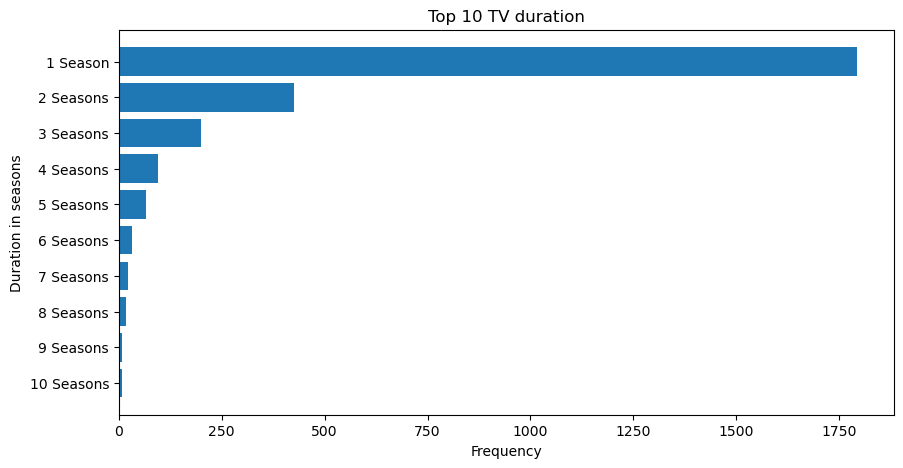

In [247]:
plt.figure(figsize=(10,5))
plt.barh(top_10_tv_duration.index, top_10_tv_duration.values)
plt.title("Top 10 TV duration")
plt.xlabel("Frequency")
plt.ylabel("Duration in seasons")
plt.show()

We observe that the majority of movies require a minimum viewing time of 90 minutes, whereas only a few TV shows extend beyond a single season.

## Evolution of Netflix

In [228]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1031
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [231]:
df_titles_per_year = df.groupby('release_year')['show_id'].count().reset_index()
df_titles_per_year

,release_year,show_id
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1031
70,2018,1147
71,2019,1030
72,2020,953


In [233]:
df_titles_after_1997 = df_titles_per_year[(df_titles_per_year['release_year'] > 1997)]
df_titles_after_1997

,release_year,show_id
50,1998,36
51,1999,39
52,2000,37
53,2001,45
54,2002,51
55,2003,61
56,2004,64
57,2005,80
58,2006,96
59,2007,88


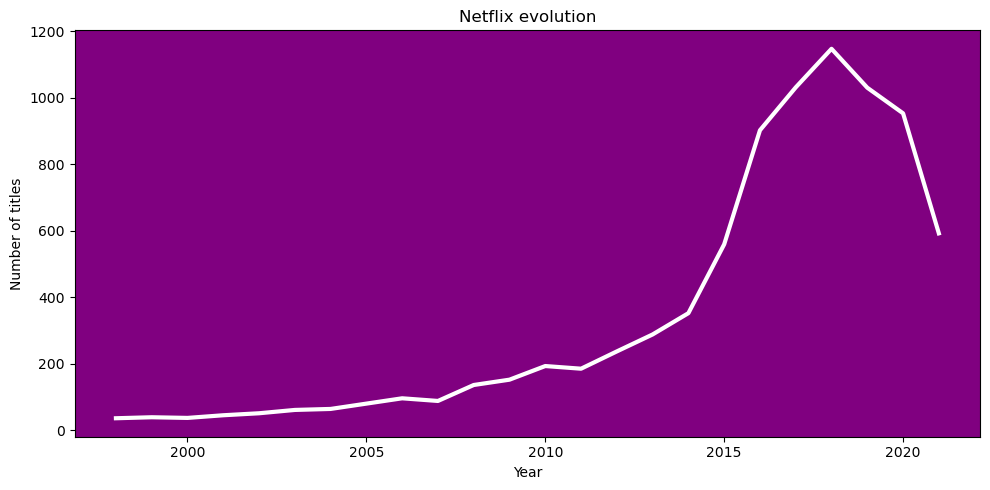

In [240]:
plt.figure(figsize=(10,5))
plt.plot(df_titles_after_1997['release_year'], df_titles_after_1997['show_id'], color='white',linewidth=3)
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.title('Netflix evolution')
plt.gca().set_facecolor('purple')
plt.tight_layout()
plt.show()

The data reveals that while Netflix scaled aggressively till 2018, external market pressures and pandemic impacts moderated their title additions post-2019.

# Summary Analysis

- Netflix's library is heavily skewed toward Movies compared to TV Shows, indicating a stronger focus on standalone storytelling formats.
- The majority of titles fall under International Movies and Dramas, reflecting Netflix's global expansion strategy and audience preference for emotionally-driven narratives.
- United States, India, and the United Kingdom emerge as the top content-producing countries on the platform, showcasing their significant contribution to Netflix’s catalog.
- Rajiv Chilaka stands out as the most prolific director, primarily driven by his contributions to animated content.
- Most content on Netflix is rated TV-MA (Mature Audience) and TV-14, indicating that a substantial portion of the library targets teenage and adult audiences.
- The majority of Movies have an average length of approximately 90 minutes, making them easily consumable.
- In contrast, a significant number of TV Shows are limited to a single season, highlighting Netflix's tendency toward short-format series or limited series offerings.
- Netflix experienced its peak expansion in 2018, when the number of available titles (Movies and TV Shows combined) exceeded 1000, marking a major milestone in its content evolution.

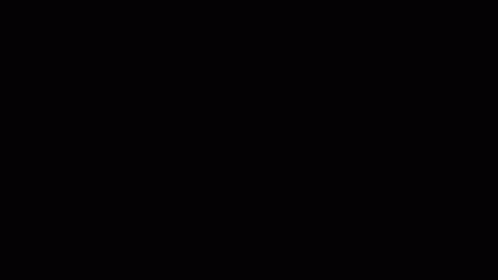